# Análise de Locações Publicitárias em Lojas da Bemol

## 1. Definição do Problema

A empresa realiza a locação de espaços publicitários em suas lojas físicas, permitindo que marcas exponham produtos em locais de destaque, como pontas de gôndola, displays e clipstrips. Essas locações precisam ser monitoradas, validadas e comprovadas.

O objetivo da análise é entender o comportamento das locações, valores praticados, segmentações por loja, tipos de espaços mais utilizados e padrões de uso — com foco na melhoria do processo de alocação e tomada de decisão para campanhas futuras.

---

### Este é um problema de aprendizado supervisionado ou não supervisionado?

Este trabalho não aborda diretamente um problema de aprendizado supervisionado ou não supervisionado, pois se trata de uma análise exploratória e preparação de dados. Entretanto, os dados podem futuramente ser usados em tarefas supervisionadas (como classificação de efetividade de locações) ou não supervisionadas (como agrupamentos por tipo de espaço ou loja).

---

### Hipóteses e Premissas

- Determinados tipos de espaços (como pontas de gôndola) podem ter maior valor de locação.
- O preço médio dos espaços pode variar de uma loja para outra.
- Itens mais locados podem estar associados a preços mais altos.
- Pode haver grande diferença no valor total locado entre diferentes lojas.

---

### Restrições de seleção dos dados

A base de dados foi retirada do sistema interno da empresa e anonimizada. Foram removidos dados sensíveis como nomes de usuários responsáveis. A análise será limitada aos campos disponíveis no dataset original, considerando apenas registros que representam locações de espaços em loja com os dados principais de período, loja, fornecedor e valor de locação.

---

### Descrição dos Atributos

| Atributo           | Descrição |
|--------------------|-----------|
| `TipoComprovacao`  | Tipo do registro (ex: Locação) |
| `Segmento`         | Segmento da loja (ex: Varejo, Farma) |
| `IdLocacao`        | Identificador único da locação |
| `Espaco`           | Tipo de espaço locado (ex: Display, Prateleira) |
| `Loja`             | Nome da loja onde a locação ocorreu |
| `Setor`            | Setor da loja (ex: Eletrônicos, LG, Checkout) |
| `Descricao`        | Descrição textual do local de exposição |
| `Fornecedor`       | Marca ou parceiro responsável pela locação |
| `Marca`            | Marca destacada no espaço locado |
| `PeriodoInicio`    | Data de início da locação |
| `PeriodoFim`       | Data de fim da locação |
| `ValorLocacao`     | Valor financeiro da locação |
| `Modificado`       | Data da última modificação do registro |
| `AnaliseIA`        | Campo textual com descrição de análise visual |
| `AprovacaoFoto`    | Indica se a foto enviada foi aprovada (SIM/NÃO) |
| `ItensExpostos`    | Lista dos produtos expostos na ação |
| `QtdExposto`       | Quantidade de itens visíveis no espaço |


## 2. Análise Inicial do Dataset

Abaixo são apresentados os primeiros registros da base, além de uma visão geral das colunas e dados disponíveis. Essa etapa nos ajuda a compreender a estrutura do dataset, identificar tipos de variáveis, possíveis dados faltantes e verificar se há algum pré-processamento necessário antes das análises mais profundas.


## 2.1 Importação das Bibliotecas

Nesta etapa, são importadas as bibliotecas necessárias para manipulação, visualização e análise dos dados:

- `pandas`: para carregar e manipular os dados em formato de tabela (DataFrame)
- `numpy`: para operações matemáticas/vetoriais
- `matplotlib` e `seaborn`: para construção de gráficos e visualizações


In [1]:
# Importação das bibliotecas principais para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações básicas de visualização
%matplotlib inline
sns.set(style="whitegrid")


## 2.2 Leitura do Dataset

O dataset foi carregado diretamente do repositório público no GitHub, no formato CSV. Abaixo são mostradas as primeiras linhas da base para visualizar sua estrutura e conteúdo inicial.


In [3]:
# Leitura do dataset diretamente da URL raw do GitHub
url = 'https://raw.githubusercontent.com/GEANCUNHA/mvp-analise-dados/main/dataset_locacoes_midia_retail.csv'
df = pd.read_csv(url, sep=';', encoding='utf-8')

# Exibir as 5 primeiras linhas do dataset
df.head()


,TipoComprovacao,Segmento,IdLocacao,Espaco,Loja,Setor,Descricao,Fornecedor,Marca,PeriodoInicio,PeriodoFim,ValorLocacao,Modificado,AnaliseIA,AprovacaoFoto,ItensExpostos,QtdExposto
0,Locação,Varejo,AMA-21-6,MESA DE VALORIZAÇÃO,Bemol Amazonas Shopping,AUTOSSERVIÇO,Estante em frente a gôndola de ventiladores,BRITÂNIA,NaN,01/11/2024,30/11/2024,2250,17/05/2025,NaN,NaN,NaN,NaN
1,Locação,Varejo,BOA-27-14,PLAQUETA DE MONITOR,Bemol Pátio Roraima Shopping,-,"333 unidades - Frente: 0,8cm (A) x 0,38 (L) cm...",CLARO,NaN,01/12/2024,30/12/2024,"142,8571429",17/05/2025,NaN,NaN,NaN,NaN
2,Locação,Varejo,AMA-17-3,HOME TV,Bemol Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,01/04/2025,30/04/2025,7350,17/05/2025,SIM - O logotipo da marca LG está claramente v...,SIM,NaN,NaN
3,Locação,Farma,604-16-3,Ponta de Gôndola - Frente de Balcão,Bemol Farma Grande Circular,NaN,NaN,FQM,FQM,01/06/2025,30/06/2025,968,23/06/2025,NaN,NaN,NaN,NaN
4,Locação,Farma,605-25-5,Clipstrip,Bemol Farma Matriz,NaN,NaN,FQM,FQM,01/06/2025,30/06/2025,88,23/06/2025,NaN,NaN,NaN,NaN


## 2.3 Estrutura Geral do Dataset

Com o comando `.info()` podemos verificar:
- Quantidade de colunas e linhas
- Tipos de dados de cada coluna
- Quantidade de valores não nulos por atributo

Essas informações ajudam a identificar possíveis campos com dados faltantes e a planejar etapas de pré-processamento.


In [4]:
# Ver informações gerais sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098 entries, 0 to 7097
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TipoComprovacao  7093 non-null   object 
 1   Segmento         7098 non-null   object 
 2   IdLocacao        7093 non-null   object 
 3   Espaco           7098 non-null   object 
 4   Loja             7098 non-null   object 
 5   Setor            3249 non-null   object 
 6   Descricao        3871 non-null   object 
 7   Fornecedor       6156 non-null   object 
 8   Marca            6530 non-null   object 
 9   PeriodoInicio    7098 non-null   object 
 10  PeriodoFim       7098 non-null   object 
 11  ValorLocacao     6011 non-null   object 
 12  Modificado       7098 non-null   object 
 13  AnaliseIA        3961 non-null   object 
 14  AprovacaoFoto    3961 non-null   object 
 15  ItensExpostos    1237 non-null   object 
 16  QtdExposto       1299 non-null   float64
dtypes: float64(1),

### Análise da Estrutura da Base

A base contém **7098 registros** distribuídos em **17 colunas**. A maioria das colunas está no formato `object`, o que é comum para textos, datas em formato string e campos categóricos.

Pontos observados:

- As colunas `TipoComprovacao` e `IdLocacao` possuem **5 valores ausentes cada**, o que merece atenção, pois são campos-chave.
- A coluna `Setor` tem muitos valores ausentes: apenas 3249 de 7098 registros (menos da metade).
- `Descricao`, `Fornecedor`, `Marca`, `AnaliseIA` e `AprovacaoFoto` também apresentam **ausência significativa de dados**.
- `ItensExpostos` e `QtdExposto` têm poucos dados preenchidos em relação ao total da base.
- A coluna `ValorLocacao`, apesar de representar um valor numérico, está como `object`, o que indica necessidade de **conversão para tipo numérico** após limpeza.
- As colunas `PeriodoInicio`, `PeriodoFim` e `Modificado` também estão como `object` e deverão ser convertidas para `datetime`.

Essas observações serão importantes para o tratamento de dados na etapa de pré-processamento.


## 2.4 Estatísticas Descritivas

A principal métrica de interesse é o `ValorLocacao`, que representa o valor financeiro de cada locação de espaço publicitário. Inicialmente, a coluna estava como texto (`object`) e precisou ser convertida para `float` para permitir análise numérica.


In [6]:
# Substituir vírgulas por ponto e converter para float
df['ValorLocacao'] = df['ValorLocacao'].str.replace(',', '.').astype(float)


In [7]:
# Estatísticas descritivas da variável de interesse
df['ValorLocacao'].describe()


,ValorLocacao
count,6011.000000
mean,2115.930571
std,2383.954106
min,0.000000
25%,275.000000
50%,968.000000
75%,3250.000000
max,20000.000000


### Análise da variável `ValorLocacao`

Após conversão da coluna para o tipo numérico, observamos:

- Quantidade de locações válidas: 6011
- Valor médio (mean): R\$ 2.115,93
- Mediana (50%): R\$ 968,00 → valor abaixo da média, indicando distribuição assimétrica (à direita), ou seja, com valores muito altos puxando a média para cima.
- Mínimo: R\$ 0,00 → pode indicar registros inválidos ou locações gratuitas.
- Máximo: R\$ 20.000,00 → representa as ações mais caras registradas.
- Desvio padrão: R\$ 2.383,95 → valor alto, o que sugere grande variabilidade nos preços praticados.

Essas informações reforçam a necessidade de investigar outliers e entender como os valores de locação variam por loja, tipo de espaço ou segmento. Também mostram que a média sozinha não é suficiente para representar o comportamento dos dados.


## 2.5 Visualização da Distribuição de Valores

Nesta etapa visualizamos a distribuição da variável `ValorLocacao` por meio de um histograma e um boxplot. Essas representações gráficas nos ajudam a identificar padrões, caudas assimétricas e outliers.


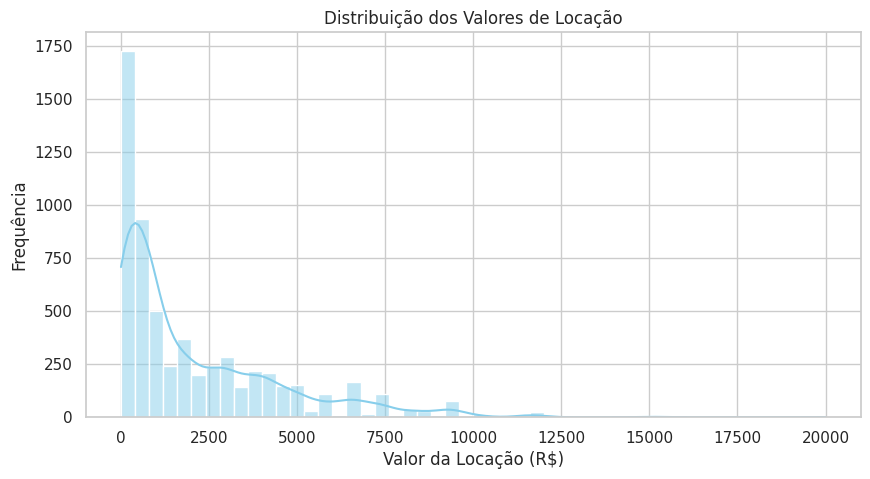

In [8]:
# Histograma da distribuição de valores
plt.figure(figsize=(10, 5))
sns.histplot(df['ValorLocacao'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição dos Valores de Locação')
plt.xlabel('Valor da Locação (R$)')
plt.ylabel('Frequência')
plt.show()


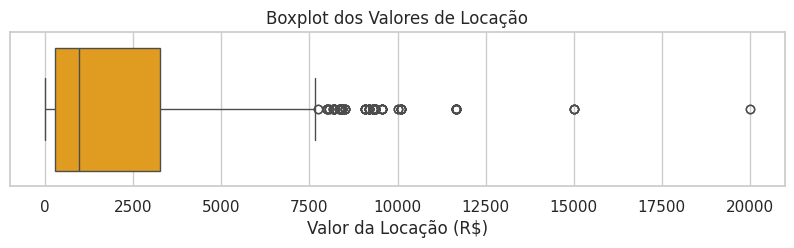

In [9]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['ValorLocacao'], color='orange')
plt.title('Boxplot dos Valores de Locação')
plt.xlabel('Valor da Locação (R$)')
plt.show()


### Análise dos Gráficos de Distribuição

A análise visual da variável `ValorLocacao` revela importantes características da base:

- **Histograma**: a distribuição dos valores é bastante concentrada nos valores mais baixos, especialmente abaixo de R\$ 3.000. A curva KDE reforça essa assimetria, com uma **cauda longa à direita**, típica de distribuições com muitos valores baixos e poucos valores muito altos.

- **Boxplot**: confirma a existência de **diversos outliers**, principalmente acima de R\$ 7.500. Esses valores, embora reais, podem distorcer médias e análises agregadas, sendo recomendável tratá-los separadamente em análises específicas.

Essa assimetria e dispersão indicam que **a mediana (R\$ 968,00)** é uma medida mais representativa do "centro" da distribuição do que a média. Também reforça a necessidade de segmentar os dados por variáveis como loja, tipo de espaço ou fornecedor para análises mais equilibradas.


## 2.6 Valor Médio de Locação por Loja

Agora analisamos quais lojas concentram os maiores valores médios de locação. Essa análise permite identificar quais unidades possuem maior potencial de receita em ações de merchandising.


/tmp/ipython-input-10-4096961481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_medio_por_loja.values, y=valor_medio_por_loja.index, palette='viridis')


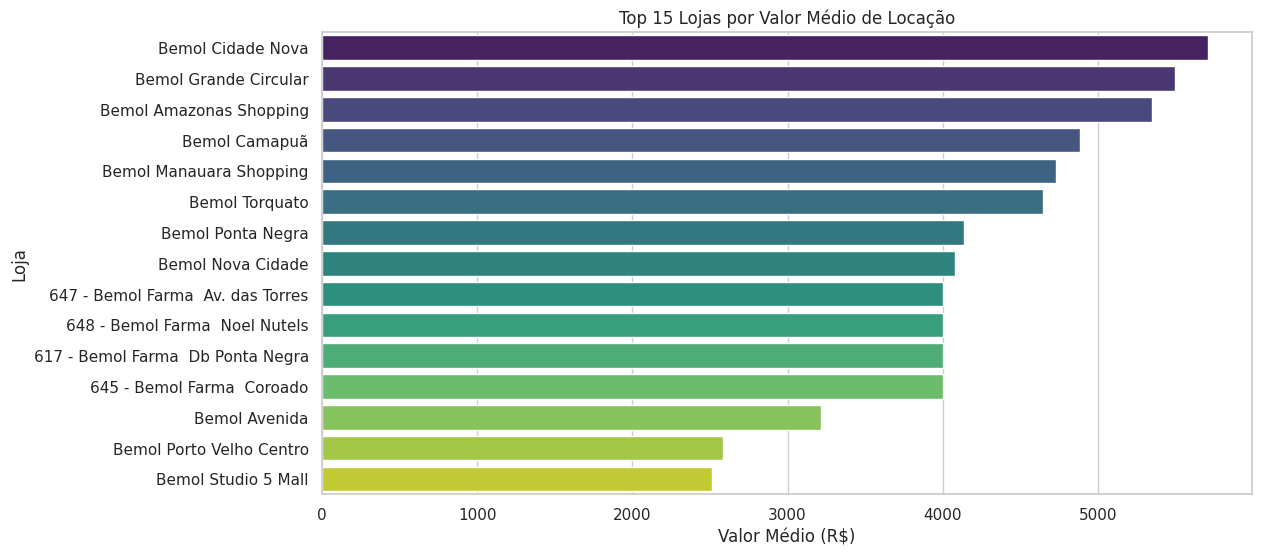

In [10]:
# Top 15 lojas com maior valor médio de locação
valor_medio_por_loja = df.groupby('Loja')['ValorLocacao'].mean().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=valor_medio_por_loja.values, y=valor_medio_por_loja.index, palette='viridis')
plt.title('Top 15 Lojas por Valor Médio de Locação')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Loja')
plt.show()


### Análise do Valor Médio de Locação por Loja

A análise do valor médio de locação por loja mostra que as unidades com maiores médias são, em sua maioria, lojas de grande porte ou localizadas em regiões de alto fluxo:

- **Bemol Cidade Nova**, **Bemol Grande Circular** e **Bemol Amazonas Shopping** lideram o ranking, todas com valor médio acima de R\$ 5.000 por locação.
- Lojas como **Bemol Manauara Shopping** e **Bemol Ponta Negra**, que possuem forte presença em centros comerciais, também figuram entre os primeiros colocados.
- As **lojas Farma** (como a 647, 648 e 617) aparecem no meio da lista, com valores médios entre R\$ 3.500 e R\$ 4.000.
- Na base da lista estão lojas com menor potencial ou volume de mídia locada, como **Porto Velho Centro** e **Studio 5 Mall**, ambas abaixo de R\$ 3.000.

Essa análise confirma a **hipótese de variação significativa entre lojas**, e reforça que o local da unidade influencia diretamente o valor praticado nas ações de merchandising.


## 2.7 Valor Total de Locação por Tipo de Espaço

Diferente da média por locação, aqui analisamos o valor total de locações acumulado por tipo de espaço. Isso permite entender quais formatos são mais utilizados e mais rentáveis para a operação.


/tmp/ipython-input-11-2810736313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=espacos_valor_total.values, y=espacos_valor_total.index, palette='flare')


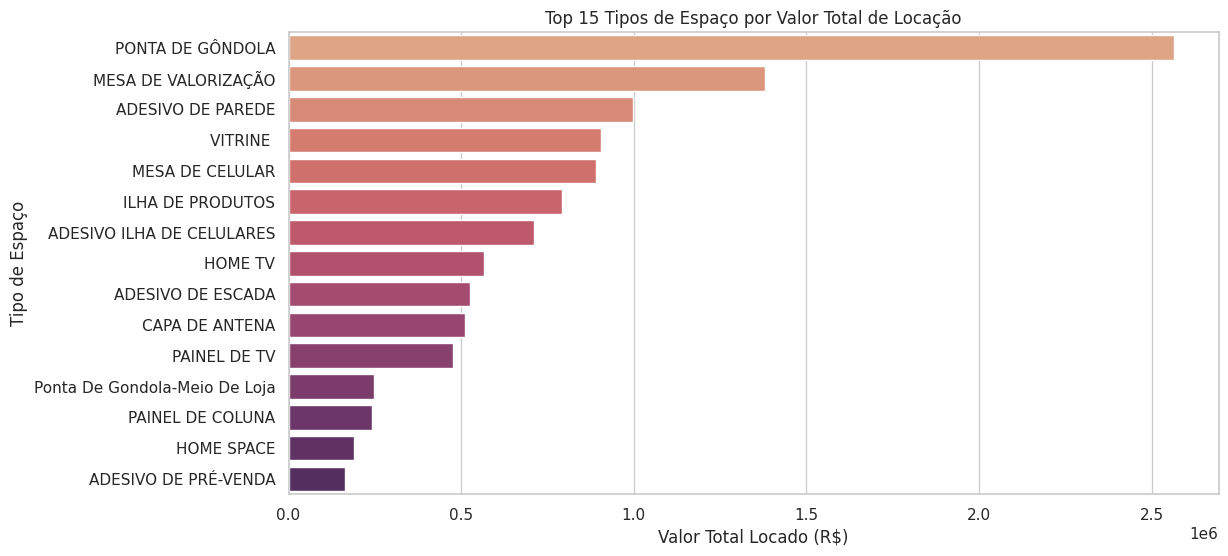

In [11]:
# Valor total de locação por tipo de espaço
espacos_valor_total = df.groupby('Espaco')['ValorLocacao'].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=espacos_valor_total.values, y=espacos_valor_total.index, palette='flare')
plt.title('Top 15 Tipos de Espaço por Valor Total de Locação')
plt.xlabel('Valor Total Locado (R$)')
plt.ylabel('Tipo de Espaço')
plt.show()


### Análise do Valor Total de Locação por Tipo de Espaço

A análise do valor total locado por tipo de espaço revela os formatos que mais geram receita ao longo do período analisado:

- Ponta de Gôndola é, de longe, o espaço mais rentável, ultrapassando R\$ 2.500.000 em valor total locado. Isso mostra sua alta demanda e valorização pelas marcas.
- Em seguida, aparecem a Mesa de Valorização e o Adesivo de Parede, ambos com valores acima de R\$ 1.000.000.
- Outros espaços relevantes são: Vitrine, Mesa de Celular, Ilha de Produtos e Adesivos em Ilhas, todos com valor total próximo ou superior a R\$ 800.000.
- Os formatos da parte inferior da lista, como Painel de Coluna, Home Space e Adesivo de Pré-venda, apresentam baixo volume de receita total — o que pode indicar menor uso, menor visibilidade ou menor valor percebido.

Essa análise ajuda a priorizar estratégias comerciais e operacionais, focando nos formatos com maior retorno financeiro.


## 2.8 Valor Total de Locações por Segmento

A análise a seguir mostra como os valores de locações se distribuem entre os segmentos de atuação, permitindo entender onde está concentrada a maior parte do faturamento com espaços publicitários.


/tmp/ipython-input-12-2562492389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_total_segmento.values, y=valor_total_segmento.index, palette='Set2')


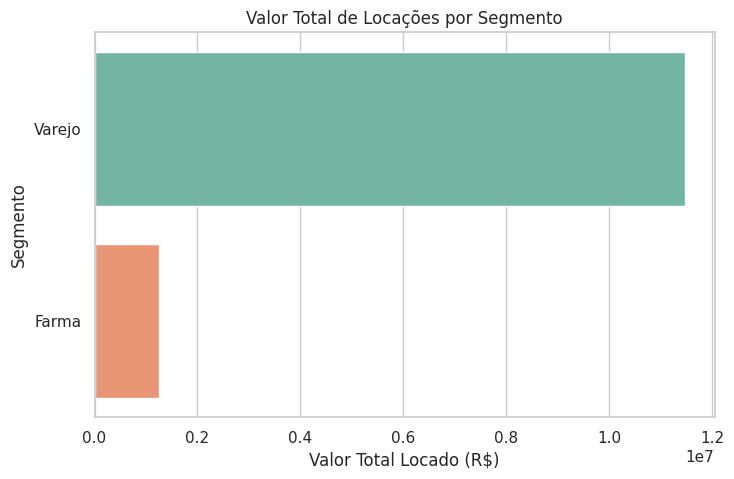

In [12]:
# Valor total por segmento
valor_total_segmento = df.groupby('Segmento')['ValorLocacao'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=valor_total_segmento.values, y=valor_total_segmento.index, palette='Set2')
plt.title('Valor Total de Locações por Segmento')
plt.xlabel('Valor Total Locado (R$)')
plt.ylabel('Segmento')
plt.show()


## 2.9 Valor Total de Locações por Mês/Ano de Início

Essa visualização permite identificar o comportamento das locações ao longo do tempo, mostrando sazonalidades, picos e possíveis períodos com baixa ou alta demanda por espaços nas lojas.


In [20]:
# Agrupar e somar os valores por data de início
tabela_valores_por_data = (
    df.groupby('PeriodoInicio')['ValorLocacao']
    .sum()
    .reset_index()
    .sort_values(by='PeriodoInicio')
)

# Exibir com formatação: R$ com separador de milhar
tabela_valores_por_data.style.format({'ValorLocacao': 'R$ {:,.2f}'})


,PeriodoInicio,ValorLocacao
0,2024-01-11 00:00:00,"R$ 665,299.68"
1,2024-01-12 00:00:00,"R$ 724,367.41"
2,2024-11-11 00:00:00,"R$ 15,000.00"
3,2025-01-01 00:00:00,"R$ 1,021,927.85"
4,2025-01-02 00:00:00,"R$ 834,187.09"
5,2025-01-03 00:00:00,"R$ 1,035,516.25"
6,2025-01-04 00:00:00,"R$ 1,381,648.83"
7,2025-01-05 00:00:00,"R$ 1,410,533.92"
8,2025-01-06 00:00:00,"R$ 1,515,026.85"
9,2025-01-07 00:00:00,"R$ 816,668.08"


## 3. Pré-processamento dos Dados

Após a análise exploratória, esta etapa tem como objetivo preparar os dados para análises mais robustas ou futuros modelos. As principais ações incluem tratamento de valores ausentes, conversão de tipos, criação de variáveis derivadas e padronização de dados.


### 3.1 Diagnóstico de Valores Ausentes

Neste passo, verificamos a quantidade e o percentual de valores ausentes em cada coluna. Essa análise é essencial para definir estratégias de limpeza, como remoção de colunas com muitos nulos, preenchimento com valores padrão ou manutenção justificada.


In [21]:
# Ver quantidade e percentual de valores nulos por coluna
faltantes = df.isnull().sum().to_frame(name='Qtd_Nulos')
faltantes['%_Nulos'] = (faltantes['Qtd_Nulos'] / len(df) * 100).round(2)
faltantes = faltantes.sort_values(by='Qtd_Nulos', ascending=False)
faltantes


,Qtd_Nulos,%_Nulos
ItensExpostos,5861,82.57
QtdExposto,5799,81.70
Setor,3849,54.23
Descricao,3227,45.46
AprovacaoFoto,3137,44.20
AnaliseIA,3137,44.20
ValorLocacao,1087,15.31
Fornecedor,942,13.27
Marca,568,8.00
TipoComprovacao,5,0.07


### 3.2 Análise e Estratégia para Valores Ausentes

Com base na análise de valores faltantes e nas definições do negócio, o plano de tratamento é o seguinte:

- `ItensExpostos` (82,57%) e `QtdExposto` (81,70%): colunas com ausência extrema. São úteis apenas para análises específicas de visibilidade, mas serão mantidos neste MPV.

- `Setor` (54,23%): manteremos a coluna e preencheremos os valores ausentes com "Setor não informado", já que pode ser relevante em análises segmentadas.

- `Descricao`, `AnaliseIA` e `AprovacaoFoto` (entre 44% e 45%): campos textuais que servem como apoio descritivo. Os nulos serão preenchidos com "Não informado".

- `ValorLocacao` (15,31%): valores nulos nessa coluna inviabilizam a análise financeira. Esses registros serão removidos do dataset.

- **Campos críticos do ponto de vista do negócio:**
  - `Marca` (8,00%)
  - `Fornecedor` (13,27%)
  - `TipoComprovacao` (0,07%)
  - `IdLocacao` (0,07%)

  Como são essenciais para rastreabilidade, validação e agrupamentos analíticos, **registros com nulos nessas colunas serão excluídos**.

As demais colunas não apresentam valores ausentes e estão aptas para uso direto.


In [23]:
# 1. Remover registros com valores nulos em colunas críticas
colunas_criticas = ['Marca', 'Fornecedor', 'TipoComprovacao', 'IdLocacao', 'ValorLocacao']
df = df.dropna(subset=colunas_criticas).copy()  # <- .copy() evita o warning!

# 2. Preencher campos textuais com "Não informado"
df.loc[:, 'Descricao'] = df['Descricao'].fillna('Não informado')
df.loc[:, 'AnaliseIA'] = df['AnaliseIA'].fillna('Não informado')
df.loc[:, 'AprovacaoFoto'] = df['AprovacaoFoto'].fillna('Não informado')

# 3. Preencher setor com valor padrão
df.loc[:, 'Setor'] = df['Setor'].fillna('Setor não informado')


In [26]:
# Confirmar que colunas críticas não possuem mais nulos
df[['Marca', 'Fornecedor', 'TipoComprovacao', 'IdLocacao', 'ValorLocacao']].isnull().sum()


,0
Marca,0
Fornecedor,0
TipoComprovacao,0
IdLocacao,0
ValorLocacao,0


### 3.4 Filtro por Segmento e Período

Com base em critérios de negócio, foram aplicados dois filtros à base:

- **Segmento 'Farma' removido**, pois não será analisado neste projeto.
- **Registros com `PeriodoInicio` anteriores a 2025 foram excluídos**, garantindo foco na operação atual e dados recentes para tomada de decisão.

Esses ajustes mantêm a base mais enxuta, consistente e alinhada aos objetivos do MVP.


In [27]:
# 1. Filtrar para manter apenas registros diferentes de 'Farma'
df = df[df['Segmento'] != 'Farma']

# 2. Filtrar datas a partir de 2025-01-01
df = df[df['PeriodoInicio'] >= pd.to_datetime('2025-01-01')]


In [29]:
# Verificar a menor data restante
df['PeriodoInicio'].min()


Timestamp('2025-01-01 00:00:00')

In [30]:
# Verificar os segmentos restantes
df['Segmento'].unique()

array(['Varejo'], dtype=object)

### 3.5 Considerações sobre Normalização

A normalização de variáveis é uma etapa importante em projetos que envolvem modelos de aprendizado de máquina ou algoritmos sensíveis à escala, como clustering, PCA ou regressões.

Entretanto, como este projeto tem foco em análise exploratória e descritiva, e as variáveis possuem significado real (ex: valores monetários em reais), a normalização **não será aplicada neste momento** para preservar a interpretabilidade dos dados.


## 4. Considerações Finais

A análise exploratória e o pré-processamento realizados sobre os dados de locações publicitárias nas lojas da Bemol permitiram entender de forma clara o comportamento desse tipo de operação no segmento de varejo.

Foram identificados os espaços que mais geram receita total, com destaque para as Pontas de Gôndola e Mesas de Valorização. Também foi possível verificar que lojas como Cidade Nova, Grande Circular e Amazonas Shopping concentram os maiores valores médios de locação.

Outro ponto relevante foi a constatação de que a maior parte das locações ocorre dentro de períodos curtos e com valores bastante concentrados abaixo da média, o que exige atenção para distorções causadas por outliers.

Com base nas premissas de negócio, a base foi filtrada para manter apenas registros do segmento Varejo, a partir de 2025, e colunas críticas foram tratadas para garantir consistência. Dados ausentes foram removidos ou preenchidos conforme seu papel na análise.

Esse estudo deixa a base pronta para etapas futuras, como desenvolvimento de indicadores de performance por espaço, otimização de preços ou até mesmo uso de modelos preditivos para estimar retorno esperado de uma locação.

O MVP cumpre seu papel ao demonstrar domínio sobre o processo de análise e preparação de dados, além de entregar insumos concretos para decisões estratégicas da área de Trade Marketing.
